# 《机器学习实战》第 3 章 决策树学习笔记

In [1]:
def create_data_set():
    data_set = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no']
    ]
    # labels 就是标签的名字而已，不作为 key
    # 只是 data_set 的两个特征的说明
    # 不是标签，不是标签，不是标签
    # surface n. 表面；表层；外观
    # flippers n. 脚蹼（flipper的复数）
    labels = ['不浮出水面是否可以生存', '是否有脚蹼']
    return data_set, labels


data_set, labels = create_data_set()

y = np.array(data_set)[:, -1]

In [2]:
len(y)

5

+ 计算香农熵的时候，使用到 collections 包下的 Counter 类，使用到的方法有 c.keys()、c.values()、list(c.elements())。

### 划分数据集，测试 split_data_set 方法

In [3]:
def split_data_set(data_set, axis, value):
    return_data_set = []
    for feature_vector in data_set:  # 遍历每一行
        if feature_vector[axis] == value:
            reduce_feature_vec = feature_vector[:axis]
            reduce_feature_vec.extend(feature_vector[axis + 1:])
            return_data_set.append(reduce_feature_vec)
    return return_data_set

In [4]:
left_data_set = np.array(data_set)[:, :-1]
left_data_set
left = np.array(left_data_set, dtype=np.int)
left


array([[1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

In [5]:
right_data_set = np.ones((len(left_data_set)), np.int).reshape(-1, 1)
right_data_set


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [6]:
data_set_for_test_split = np.concatenate((left, right_data_set), axis=1)
data_set_for_test_split


array([[1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1],
       [0, 1, 1]])

In [7]:
split_data_set(data_set_for_test_split.tolist(), 1, 1)

split_data_set(data_set_for_test_split.tolist(), 1, 0)

[[1, 1]]

### 选择最好的数据集划分方式

In [8]:
from collections import Counter
from trees import calc_shannon_entropy
from trees import choose_best_feature_to_split

In [9]:
choose_best_feature_to_split(data_set)

base_entropy 0.9709505944546686
info gain D,A_0 = 0.971 - 0.551 = 0.420
info gain D,A_1 = 0.971 - 0.800 = 0.171


0

In [14]:
# 统计学习方法里面的例子
origin_data = pd.read_csv('./loan_example.csv')

loan_data = origin_data.values.tolist()
feature_names = origin_data.columns.values.tolist()[:-1]

In [15]:
loan_data

[['青年', '否', '否', '一般', '否'],
 ['青年', '否', '否', '好', '否'],
 ['青年', '是', '否', '好', '是'],
 ['青年', '是', '是', '一般', '是'],
 ['青年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '好', '否'],
 ['中年', '是', '是', '好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '好', '是'],
 ['老年', '是', '否', '好', '是'],
 ['老年', '是', '否', '非常好', '是'],
 ['老年', '否', '否', '一般', '否']]

In [16]:
feature_names

['年龄', '有工作', '有自己的房子', '信贷情况']

In [17]:
choose_best_feature_to_split(loan_data)

base_entropy 0.9709505944546686
info gain D,A_0 = 0.971 - 0.888 = 0.083
info gain D,A_1 = 0.971 - 0.647 = 0.324
info gain D,A_2 = 0.971 - 0.551 = 0.420
info gain D,A_3 = 0.971 - 0.608 = 0.363


2

### 使用多数表决的方法决定叶子节点的分类

### 递归创建决策树

停止划分的条件：
1. 当前数据集所有的类别都相同
2. 特征列表全部使用完

In [18]:
from trees import split_data_set
from trees import create_tree

create_tree(loan_data,feature_names)

base_entropy 0.9709505944546686
info gain D,A_0 = 0.971 - 0.888 = 0.083
info gain D,A_1 = 0.971 - 0.647 = 0.324
info gain D,A_2 = 0.971 - 0.551 = 0.420
info gain D,A_3 = 0.971 - 0.608 = 0.363
base_entropy 0.9182958340544896
info gain D,A_0 = 0.918 - 0.667 = 0.252
info gain D,A_1 = 0.918 - 0.000 = 0.918
info gain D,A_2 = 0.918 - 0.444 = 0.474


{'有自己的房子': {'否': {'有工作': {'否': '否', '是': '是'}}, '是': '是'}}

## 下面介绍一些绘图的 API

### 使用注解绘制树节点

一些配置参数

In [19]:
decision_node = dict(boxstyle='sawtooth',fc='0.8')
decision_node

{'boxstyle': 'sawtooth', 'fc': '0.8'}

In [20]:
leaf_node = dict(boxstyle='round4',fc='0.8')
leaf_node

{'boxstyle': 'round4', 'fc': '0.8'}

In [21]:
arrow_args = dict(arrowstyle='<-')
arrow_args

{'arrowstyle': '<-'}

In [22]:
fig = plt.figure(1,facecolor='white')
fig.clf()

<Figure size 432x288 with 0 Axes>

In [23]:
def create_plot():
    fig = plt.figure(1,facecolor='white')
    # Clear the figure.
    fig.clf()
    create_plot.ax1 = plt.subplot(111,frameon=False)#
    plot_node('决策节点',(0.5,0.1),(0.1,0.5),decision_node)
    plot_node('叶子节点',(0.8,0.1),(0.3,0.5),leaf_node)
    plt.show()

NameError: name 'plot_node' is not defined

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


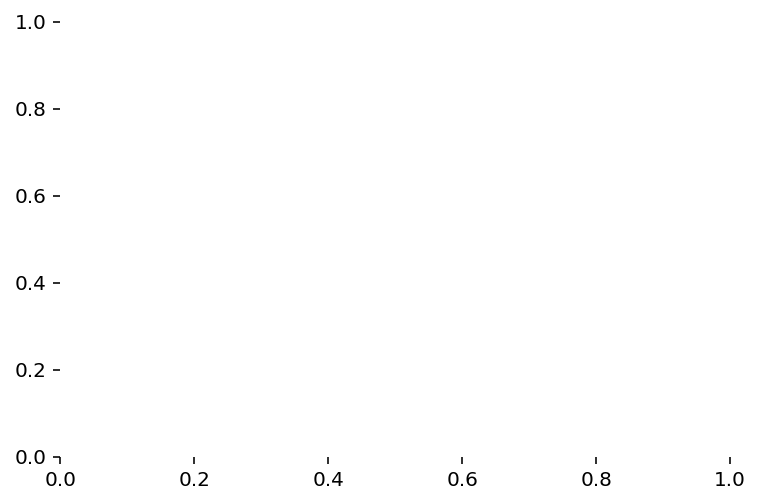

In [24]:
create_plot()

## 在 Python 中使用 Matplotlib 注解绘制树形图

In [25]:
decision_tree_json = {'有自己的房子': {'否': {'有工作': {'否': '否', '是': '是'}}, '是': '是'}}

In [26]:
from trees import create_plot

create_plot(decision_tree_json)

ImportError: cannot import name 'create_plot'

## 使用决策树的分类函数

In [27]:
def predict(input_tree,feature_labels,test_vector):
    first_str = list(input_tree.keys())[0]
    second_dict = input_tree[first_str]
    feature_index = feature_labels.index(first_str)
    for key,value in second_dict.items():
        if test_vector[feature_index] == key:
            if type(value).__name__ == 'dict':
                class_label = predict(value,feature_labels,test_vector)
            else:
                class_label = value
    return class_label

In [28]:
predict(decision_tree_json,['年龄', '有工作', '有自己的房子', '信贷情况'],['青年','否','否','一般'])

'否'

In [29]:
predict(decision_tree_json,['年龄', '有工作', '有自己的房子', '信贷情况'],['青年','是','否','好'])

'是'

In [30]:
loan_data

[['青年', '否', '否', '一般', '否'],
 ['青年', '否', '否', '好', '否'],
 ['青年', '是', '否', '好', '是'],
 ['青年', '是', '是', '一般', '是'],
 ['青年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '好', '否'],
 ['中年', '是', '是', '好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '好', '是'],
 ['老年', '是', '否', '好', '是'],
 ['老年', '是', '否', '非常好', '是'],
 ['老年', '否', '否', '一般', '否']]

In [31]:
y = np.zeros(len(loan_data))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
for i in range(len(loan_data)):
    predict_result = predict(decision_tree_json,['年龄', '有工作', '有自己的房子', '信贷情况'],loan_data[i])
    print(predict_result,end=' ')
    predict_result = 1 if predict_result == '是' else 0
    print(predict_result)
    y[i] = predict_result

否 0
否 0
是 1
是 1
否 0
否 0
否 0
是 1
是 1
是 1
是 1
是 1
是 1
是 1
否 0


In [33]:
y

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.])

In [34]:
true_label = np.array([1 if x[-1]=='是' else 0 for x in loan_data])

In [35]:
true_label

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [36]:
# 全部预测正确
sum(y==true_label)/len(loan_data)

1.0

### Counter 的遍历和计数

In [37]:
from collections import Counter

c = Counter([1, 1, 1, 3, 3, 2])
for key, v in c.items():
    print(key, v)

1 3
3 2
2 1


In [38]:
from collections import Counter

c = Counter([1, 1, 1, 3, 3, 2])
c.most_common(1)[0][0]

1